# Đồ họa thống kê với Python

## Bài 4: Mạng lưới tương quan

### BS. Lê Ngọc Khả Nhi

Thân chào các bạn đồng nghiệp. Đây là bài thứ 4 trong chuyên đề đồ họa thống kê với ngôn ngữ Python. Mục tiêu của bài này nhằm hướng dẫn các bạn sử dụng package networkx để chuyển một ma trận tương quan thành biểu đồ mạng. 

Chúng ta bắt đầu từ phân tích tương quan (tuyến tính), đây là một thao tác thông dụng nhằm khảo sát về mức độ liên hệ tuyến tính giữa các biến số trong dữ liệu. Trong Python, phân tích tương quan có thể được thực hiện rất dễ dàng bằng method corr() từ pandas dataframe, thí dụ như sau:

In [1]:
import numpy as np
import pandas as pd

print(f'Dùng numpy {np.__version__}, pandas {pd.__version__}')

Dùng numpy 1.18.1, pandas 1.0.1


In [2]:
from sklearn import datasets
 
df = datasets.load_iris()
df = pd.DataFrame(df['data'], columns=df['feature_names'])

df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Như ta thấy, kết quả của phân tích tương quan được trình bày dưới hình thức một bảng 2 chiều (matrix), cho phép tra cứu ngẫu nhiên giá trị hệ số tương quan (Pearson's r, Spearman's Rho) và/hoặc giá trị p của t_test, để kết luận về chiều, kích thước và ý nghĩa thống kê của mối liên hệ tuyến tính giữa 2 biến được bắt cặp tuần tự trong dữ liệu.

Chú ý là trên thực tế, ta chỉ quan tâm đến nội dung của 1 nửa matrix, và không quan tâm đến đường chéo matrix; vì matrix này có 2 phần trên và dưới đối xứng nhau, và đường chéo toàn giá trị = 1 tương ứng với hệ số tương quan khi 1 biến bắt cặp với chính nó.

method corr của pandas chỉ xuất ra giá trị hệ số tương quan r, nếu ta muốn biết thêm về ý nghĩa thống kê, ta cần làm 1 kiểm định t (dùng module stats của package scipy). Kết quả là 1 matrix các p_values. Nhi viết 1 hàm cho phép xuất ra matrix cho cả r và p

In [80]:
def correlation_matrix(df = None, method = 'pearson'):
    
    '''
    Hàm thực hiện phân tích tương quan
    # Input: pandas dataframe 
    # Arguments: df = pandas dataframe chứa datatype là int hoặc float
                 method = string, giá trị có thể: 'pearson', 'spearman'
    # Output: 2 matrices r và p_vals
    '''
    
    from scipy.stats import pearsonr
    import itertools
    
    corr = df.corr(method = method)
    pvals = np.ones_like(corr)
    
    m = df.values
    n = df.shape[1]
    
    out = [pearsonr(m[:,i],m[:,j])+(i, j) for i, j in itertools.product(range(n), range(n))]
    
    for i in out:
        pvals[i[2],i[3]] = i[1]
    
    pvals = pd.DataFrame(pvals, columns=corr.columns, index = corr.index)
    
    return corr, pvals

In [64]:
corr, pvals = correlation_matrix(df)

In [65]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [66]:
pvals

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.000000e+00,1.518983e-01,1.038667e-47,2.325498e-37
sepal width (cm),1.518983e-01,0.000000e+00,4.513314e-08,4.073229e-06
petal length (cm),1.038667e-47,4.513314e-08,0.000000e+00,4.675004e-86
petal width (cm),2.325498e-37,4.073229e-06,4.675004e-86,0.000000e+00


Một hình thức khác để trình bày kết quả phân tích tương quan, đó là dùng đồ họa; cụ thể là 1 heatmap (còn gọi là correlogram). Như ta biết, heatmap đơn giản là hình ảnh của matrix, trong đó những con số được chuyển thành màu sắc, thông thường là 1 phổ màu liên tục.

Heatmap hay correlogram dễ đọc hơn so với correlation matrix, vì thị giác con người nhạy cảm với màu sắc và có thể phân biệt ngay tức khắc nhiều triệu màu khác nhau, trong khi với con số thì ta cần thời gian tương đối để phân định về giá trị con số này. Heatmap có ưu thế tuyệt đối khi ta phân tích một dữ liệu với nhiều biến, lúc này ta không thể dùng correlation matrix được nữa vì kích thước matrix trở nên quá lớn.

Trong thí dụ sau, ta có dữ liệu breast_cancer gồm 30 biến, correlation matrix do đó sẽ có kích thước 30x30:
Ta có thể chuyển correlation matrix thành heatmap bằng package seaborn:

In [81]:
df = datasets.load_breast_cancer()
df = pd.DataFrame(df['data'], columns=df['feature_names'])

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
corr, pvals = correlation_matrix(df)

corr.shape

(30, 30)

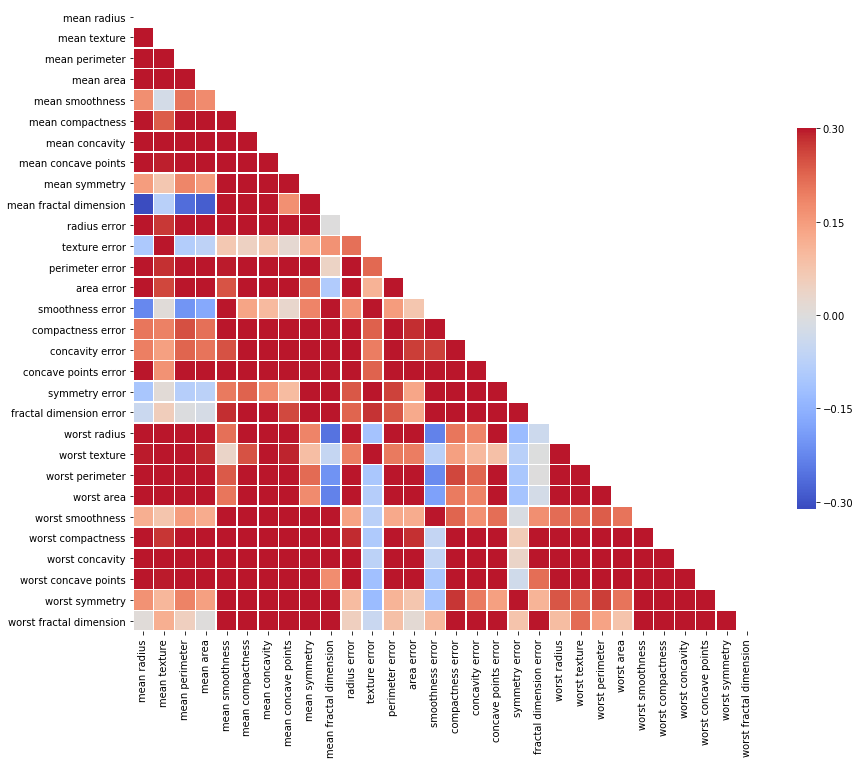

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(corr,
            mask=mask, 
            vmax=.3, 
            center=0,
            cmap = plt.cm.coolwarm,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

Tuy nhiên, heatmap chưa phải là dạng biểu đồ tối ưu để trình bày correlation matrix; vì 2 nguyên nhân: Thứ nhất, heatmap truyền tải thông tin chính là màu sắc; nhưng màu sắc lại là tín hiệu thị giác kém hiệu quả nhất so với những tín hiệu khác như tọa độ/vị trí, khoảng cách, chiều dài, diện tích hoặc góc. Thứ hai, ngay cả heatmap cũng không đủ sức trình bày một dữ liệu với rất nhiều (hàng trăm...) biến số, lúc này độ phân giải của các mảng màu không còn đủ lớn và rất khó phân định.

Trong bài này, ta sẽ dùng một biểu đồ khác tốt hơn nhiều so với heatmap, đó là network.

Network dựa vào một cấu trúc dữ liệu đặc biệt là graph, là một tập hợp các node (vertex) và edges (arcs, link). Bản thân graph hay network đã hàm chứa ý nghĩa về các mối liên kết giữa các nodes. Mặt khác, graph có thể được xây dựng từ adjacency matrix - chính là correlation matrix mà ta đang có; nên network hết sức thích hợp để trình bày kết quả phân tích tương quan. 

Để dựng một correlation network, ta sẽ đi qua 6 bước:

1) Tạo adjacency matrices (r, pvals)
2) Chuyển toàn bộ giá trị matrix diagonal thành 0
3) Lọc bỏ bớt những cặp liên kết vô nghĩa hay không quan trọng (dựa vào pvalues, thí dụ 0.05 hay r, thí dụ 0.5)
4) Chuyển adjacency matrices thành graph
5) Thêm attributes khác cho nodes, edges nếu cần (thí dụ r cho edges, degree cho nodes).
6) Dùng 1 package đồ họa để vẽ graph 

Trong Python, package networkx hỗ trợ tất cả quy trình này (và hơn thế nữa). Phần đồ họa dùng matplotlib

In [77]:
plt.rcParams.update({
    'figure.figsize': (14, 14),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

np.random.seed(123)

import networkx as nx

Nhi viết 1 hàm để thực hiện lần lượt các bước trên:

In [82]:
def correlation_network(df = None, 
                        coefthres = 0.0, pvalthres = 0.05, font_size = 5, width = 0.1):
    
    # 1) Tạo adjacency matrices
    corr, pvals = correlation_matrix(df, method = 'pearson')
    
    # 2) Lọc bỏ diagonal
    np.fill_diagonal(corr.values, 0)
    
    # 3) Lọc bỏ các edges theo ngưỡng r,p
    corr[np.abs(corr) <= coefthres] = 0
    corr[pvals > pvalthres] = 0
    
    # 4) Chuyển adjacency sau khi làm sạch thành graph
    C = nx.from_pandas_adjacency(corr)
    
    # 5) Trích xuất weights (giá trị r của edges) và degrees (số liên kết đi đến 1 node)
    weights = np.array([d['weight'] for s,t,d in C.edges(data=True)])
    degrees = np.array([val for (node, val) in C.degree()])
    
    # 6) Vẽ graph
    pos = nx.spring_layout(C)
    
    edges = nx.draw_networkx_edges(C,pos,
                                   edge_color=weights,
                                   width=width,
                                   edge_cmap=plt.cm.coolwarm)
    
    nodes = nx.draw_networkx(C, pos,
                             width=width,
                             edge_color=weights,
                             node_color=degrees,
                             cmap = plt.cm.Reds,
                             edge_cmap=plt.cm.coolwarm,
                             node_size = 12*(degrees+5),
                             font_size = font_size,
                             )
    
    return C

áp dụng hàm này trên dataset breast_cancer 30 biến:

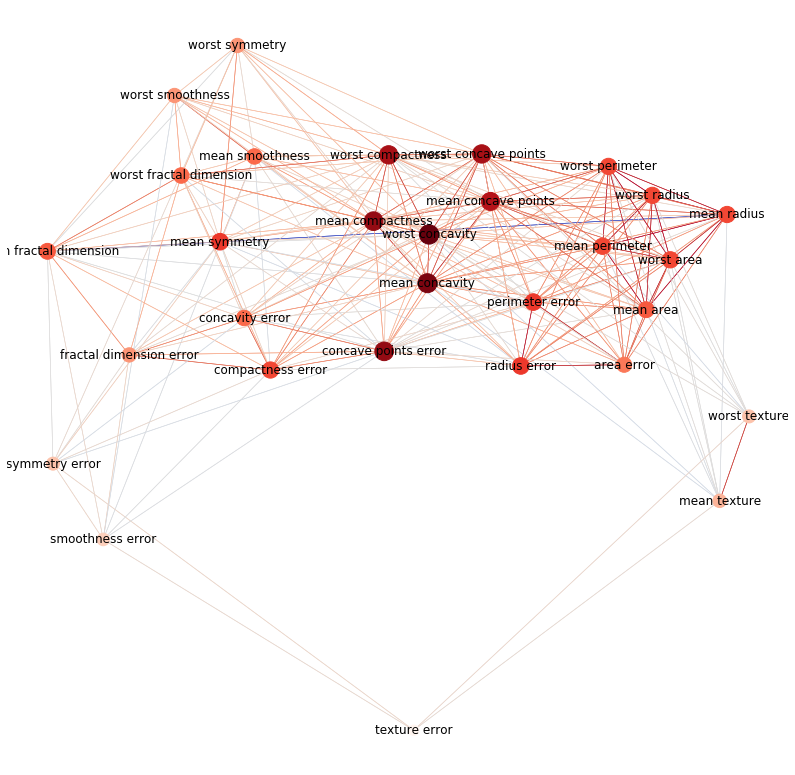

In [87]:
C = correlation_network(df,
                        coefthres = 0.3, # chỉ lấy r > 0.3
                        pvalthres = 0.05, # loại bỏ các liên kết vô nghĩa
                        font_size = 12,
                        width = 0.6)

Trong network này, màu sắc của edges thể hiện chiều và độ lớn của hệ số tương quan, kích thước và màu của nodes tỉ lệ với degree của node đó. Như vậy biến nào có vai trò trung tâm sẽ có node kích thước lớn hơn, màu đậm hơn.

In [88]:
[i for i in C.degree()]

[('mean radius', 17),
 ('mean texture', 10),
 ('mean perimeter', 17),
 ('mean area', 16),
 ('mean smoothness', 15),
 ('mean compactness', 24),
 ('mean concavity', 25),
 ('mean concave points', 22),
 ('mean symmetry', 18),
 ('mean fractal dimension', 16),
 ('radius error', 18),
 ('texture error', 4),
 ('perimeter error', 18),
 ('area error', 14),
 ('smoothness error', 8),
 ('compactness error', 17),
 ('concavity error', 15),
 ('concave points error', 24),
 ('symmetry error', 9),
 ('fractal dimension error', 12),
 ('worst radius', 17),
 ('worst texture', 9),
 ('worst perimeter', 17),
 ('worst area', 17),
 ('worst smoothness', 12),
 ('worst compactness', 23),
 ('worst concavity', 26),
 ('worst concave points', 23),
 ('worst symmetry', 12),
 ('worst fractal dimension', 15)]

Ta thử hàm này cho 1 dataset khác có kích thước lớn hơn nhiều, đến 400 biến. Đây là dataset leukemia trong 1 bài toán machine learning chẩn đoán ung thư máu dựa vào expression của hơn 7000 genes, ở đây ta chỉ trích ra 400 genes đầu tiên

T.R. Golub, D. K. Slonim, P. Tamayo, et al. Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring. Science 1999; 286:531-537

In [89]:
path = 'https://www.openml.org/data/get_csv/53987/leukemia.csv'

df = pd.read_csv(path).drop(['CLASS'], axis=1).iloc[:,:400]

df.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,D38449_at,D38462_at,D38491_at,D38500_at,D38503_at,D38521_at,D38522_at,D38524_at,D38535_at,D38548_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-73,-43,75,-261,-9,280,13,296,758,824
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-15,-26,174,-277,-32,631,5,839,846,459
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,-180,38,258,-230,34,339,83,304,718,467
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,24,-14,140,-56,11,357,102,459,434,666
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,63,-32,192,-321,-16,498,99,470,446,1116


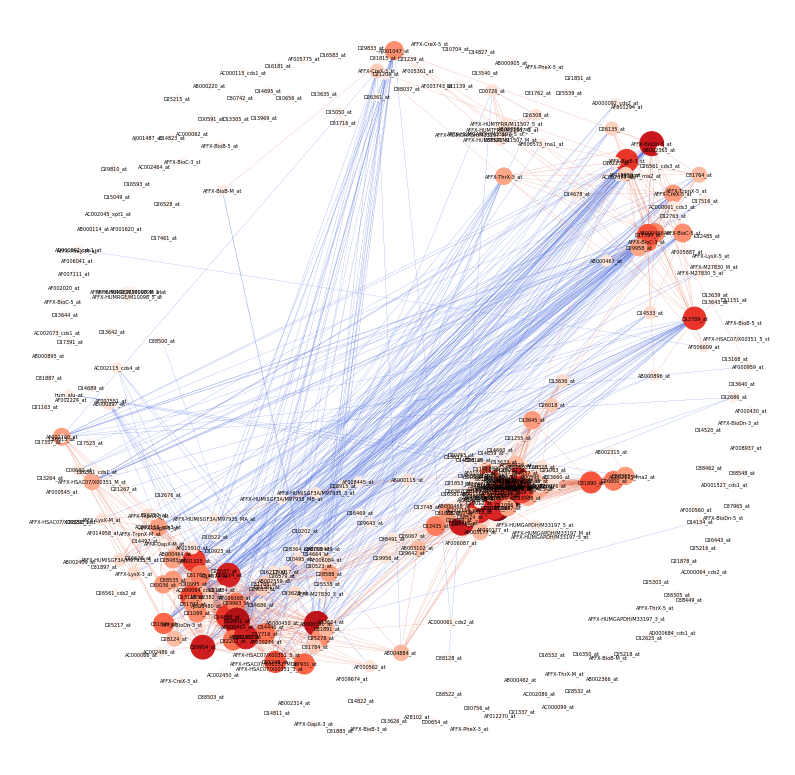

In [95]:
C = correlation_network(df,
                    coefthres = 0.55,
                    pvalthres = 0.01,
                    font_size = 5,
                    width = 0.1)

# Bàn luận

Correlation network hiệu quả hơn rất nhiều so với heatmap. Network có khả năng truyền tải lượng thông tin lớn: nodes thể hiện các biến số, tọa độ và khoảng cách các nodes cho phép gom cụm những biến số liên hệ chặt chẽ với nhau, hay có vai trò trung tâm kết nối các biến khá; node lại cho phép tải thêm 3 thông tin khác qua 3 kênh: hình dạng (tròn, vuông, tam giác..., biến rời rạc), màu sắc (biến liên tục), diện tích (biến liên tục). Trong khi đó, edges thể hiện mối liên hệ giữa 2 nodes, và lại hỗ trợ thêm 3 kênh thông tin khác gồm : nét (liên tục, đứt quãng...: biến rời rạc), màu sắc (biến liên tục), độ dày (biến liên tục). Như vậy 1 correlation network có thể tải được từ 6-10 chiều thông tin khác nhau.

Bài thực hành đã hết, hẹn gặp lại các bạn lần sau